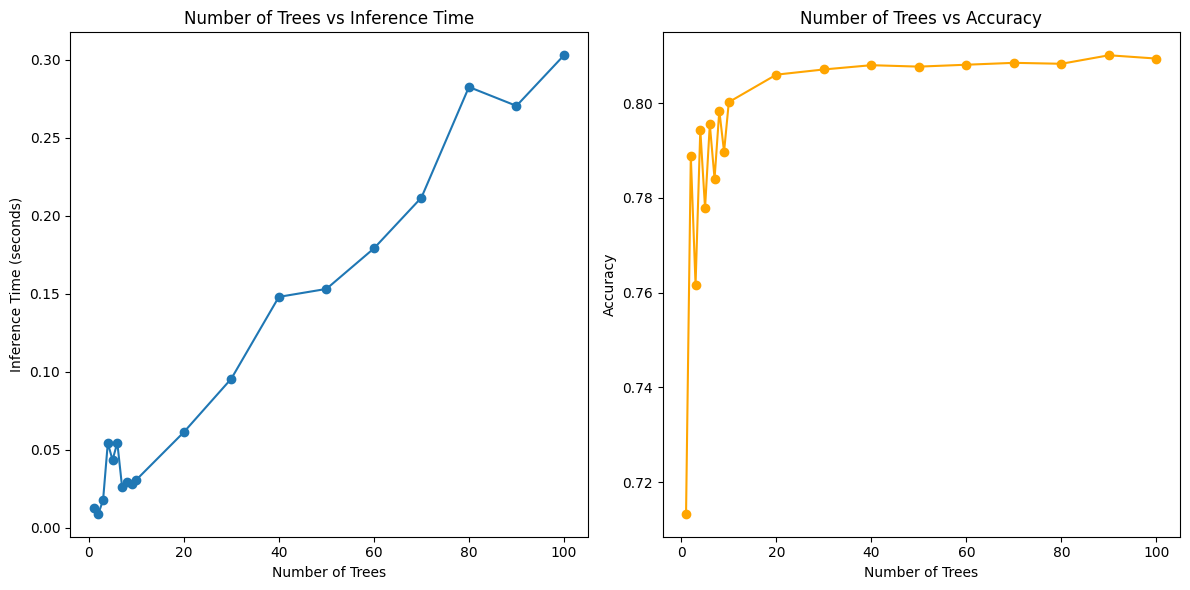

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import joblib
import time

file_path = '/content/received_data.txt'
with open(file_path, 'r') as file:
    lines = file.readlines()

data_0 = [(float(entry.split('(')[1].split(',')[0]),
           float(entry.split(',')[1]),
           float(entry.split(',')[2].split(')')[0]))
          for entry in lines if entry.startswith('0')]

data_1 = [(float(entry.split('(')[1].split(',')[0]),
           float(entry.split(',')[1]),
           float(entry.split(',')[2].split(')')[0]))
          for entry in lines if entry.startswith('1')]

x_0, y_0, z_0 = zip(*data_0) if data_0 else ([], [], [])
x_1, y_1, z_1 = zip(*data_1) if data_1 else ([], [], [])

features = np.array(data_0 + data_1)
labels = np.array([0] * len(data_0) + [1] * len(data_1))

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

num_trees_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
inference_times = []
accuracies = []

for num_trees in num_trees_values:
    rf_classifier = RandomForestClassifier(n_estimators=num_trees, random_state=42)
    rf_classifier.fit(X_train, y_train)

    start_time = time.time()
    predictions = rf_classifier.predict(X_test)
    inference_time = time.time() - start_time
    inference_times.append(inference_time)

    accuracy = accuracy_score(y_test, predictions)
    accuracies.append(accuracy)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(num_trees_values, inference_times, marker='o')
plt.xlabel('Number of Trees')
plt.ylabel('Inference Time (seconds)')
plt.title('Number of Trees vs Inference Time')

plt.subplot(1, 2, 2)
plt.plot(num_trees_values, accuracies, marker='o', color='orange')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.title('Number of Trees vs Accuracy')

plt.tight_layout()
plt.show()
